# General Purpose Parallel Processing Analytic Hierarchy Process Calculator
### By: Braidan Duffy

This script will run a full AHP analysis of several alternatives for a General Purpose Parallel Processor (GPPP) for an Autonomous Unmanned Aerial Vehicle (AUAV)

The AHP is structured as such

    Goal: Use a GPPP to perform ATC on a video feed and determine TOI/OOI
      |
      |- C1: FP32 performance
      |- C2: Processor base speed
      |- C3: Price
      |- C4: Core count
      |- C5: Power consumption
      |- C6: Memory
          |
          |- Alternative A: Nvidia RTX 4090
          |- Alternative B: Nvidia RTX 3090 Ti
          |- Alternative C: Nvidia RTX A100
          |- Alternative D: Nvidia RTX A6000
          |- Alternative E: Nvidia RTX A5000

In [1]:
# Import relevant functions and libraries
from ahp import *
import numpy as np

## Define Alternatives

In [2]:
nvidia_rtx4090 = {
    "fp32_performance": 83,     # TFLOPS
    "base_speed":       2235,   # MHz
    "price":            1600,   # USD
    "core_count":       16384,
    "power":            450,    # W
    "memory":           24      # GB
}

nvidia_rtx3090ti = {
    "fp32_performance": 40,     # TFLOPS
    "base_speed":       1560,   # MHz
    "price":            1100,   # USD
    "core_count":       10752,
    "power":            450,    # W
    "memory":           24      # GB
}

nvidia_rtxA100 = {
    "fp32_performance": 20,     # TFLOPS
    "base_speed":       765,    # MHz
    "price":            10000,  # USD
    "core_count":       6912,
    "power":            400,    # W
    "memory":           80      # GB
}

nvidia_rtxA6000 = {
    "fp32_performance": 39,     # TFLOPS
    "base_speed":       1410,   # MHz
    "price":            4000,   # USD
    "core_count":       10572,
    "power":            300,    # W
    "memory":           48      # GB
}

nvidia_rtxA5000 = {
    "fp32_performance": 28,     # TFLOPS
    "base_speed":       1170,   # MHz
    "price":            2500,   # USD
    "core_count":       8192,
    "power":            230,    # W
    "memory":           24      # GB
}

alternatives = [nvidia_rtx4090, nvidia_rtx3090ti, nvidia_rtxA100, nvidia_rtxA6000, nvidia_rtxA5000]

## Define Criteria Priority
The weight matrix for criteria is described by an NxN matrix where N is the number of criteria as shown below:

|C1      | C2      | C3         | C4         | C5         | C6       | 
| ------ | ------- | ---------- | ---------- | ---------- | -------- |
| 1      | $w_1$   | $w_2$      | $w_3$      | $w_4$      | $w_5$    | 
 $1/w_1$ | 1       | $w_6$      | $w_7$      | $w_8$      | $w_9$    |
 $1/w_2$ | $1/w_6$ | 1          | $w_{10}$   | $w_{11}$   | $w_{12}$ |
 $1/w_3$ | $1/w_7$ | $1/w_{10}$ | 1          | $w_{13}$   | $w_{14}$ |
 $1/w_4$ | $1/w_8$ | $1/w_{11}$ | $1/w_{13}$ | 1          | $w_{15}$ |
 $1/w_5$ | $1/w_9$ | $1/w_{12}$ | $1/w_{14}$ | $1/w_{15}$ | 1        |

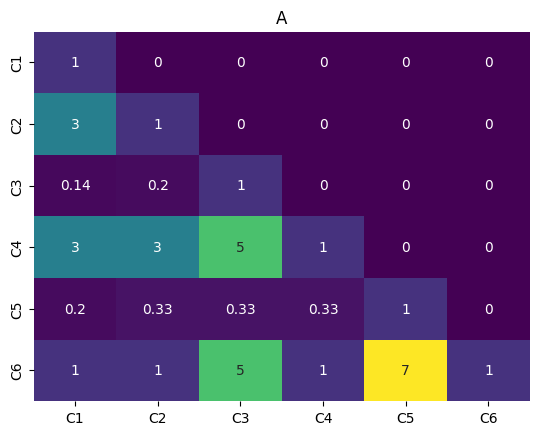

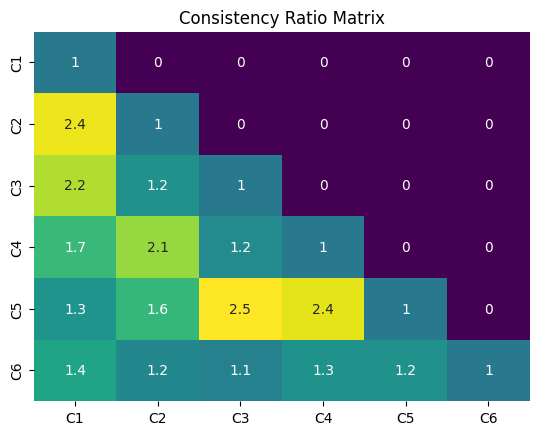

       Weights Weights +/-    RGMM     +/-
Crit-1  16.90%       9.18%  17.22%   9.27%
Crit-2  21.20%      13.08%  21.18%  10.87%
Crit-3   5.30%       3.36%   5.18%   2.57%
Crit-4  30.40%      17.03%  30.54%  15.68%
Crit-5   4.40%       2.75%   4.42%   2.43%
Crit-6  21.80%       4.90%  21.46%   4.76%
 
Consistency Ratio: 10.97% & Consistency Ratio of Weighted: 12.30%


In [3]:
a_c_weights = [1/3, 7, 1/3, 5, 1, 5, 1/3, 3, 1, 1/5, 3, 1/5, 3, 1, 1/7]

A_C, weights, cr, rgmm11 = AHP_1_Participant(a_c_weights)

The Consistency Ratio (CR) is slightly above 10%, which is not ideal. However, it is still acceptable since it is not significantly larger than 10%. 
We will trim the criteria that are not heavily weighted to reduce the computational load later on. Here, C3 and C5 have significantly less weight than the others, so they can be removed.

In [4]:
c_priority = weights["Weights"].apply(pd.Series).stack().tolist() # Convert weights pandas df vector to normal list
c_priority.remove(c_priority[2]) # Remove C3 from list
c_priority.remove(c_priority[4]) # Remove C5 from list
c_priority = [eval(i.strip('%'))/100 for i in c_priority] # Convert strings from pandas df vector to list of floats

## Define Priority Vector for Each Alternative WRT Each Criterion

We need to see how each alternative stacks against each other with respect to the individual criteria

### C1: FP32 Performance

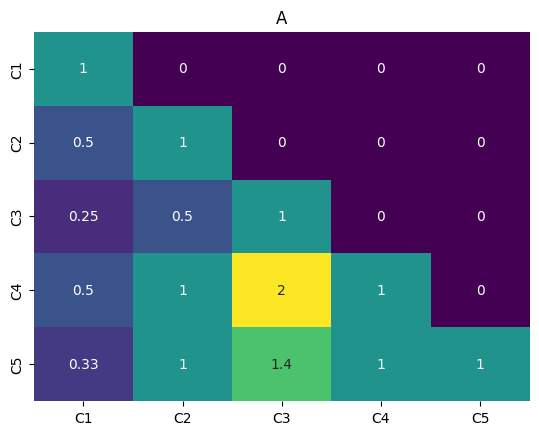

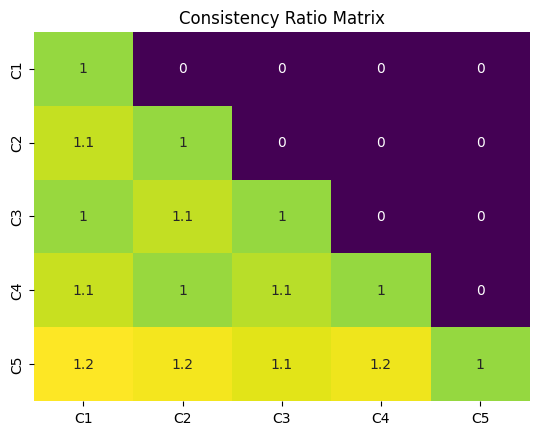

       Weights Weights +/-    RGMM    +/-
Crit-1  39.00%       4.38%  38.98%  4.05%
Crit-2  18.00%       1.59%  17.96%  1.69%
Crit-3   9.70%       0.82%   9.68%  0.77%
Crit-4  17.90%       1.50%  17.86%  1.60%
Crit-5  15.50%       2.32%  15.52%  2.32%
 
Consistency Ratio: 0.51% & Consistency Ratio of Weighted: 0.50%


In [5]:
a_c1_weights = [] # Weight vector for C1 weights
for i in range(len(alternatives)-1):
    for j in range(i+1, len(alternatives)):
        w = alternatives[i]["fp32_performance"] / alternatives[j]["fp32_performance"]
        w = round(w) if w > 1 else w # Round off the whole numbers > 1
        a_c1_weights.append(w)

A_C1, weights, cr, rgmm11 = AHP_1_Participant(a_c1_weights)
c1_priority = weights["Weights"].apply(pd.Series).stack().tolist() # Convert weights pandas df vector to normal list
c1_priority = [eval(i.strip('%'))/100 for i in c1_priority] # Convert strings from pandas df vector to list of floats

### C2: Processor Speed

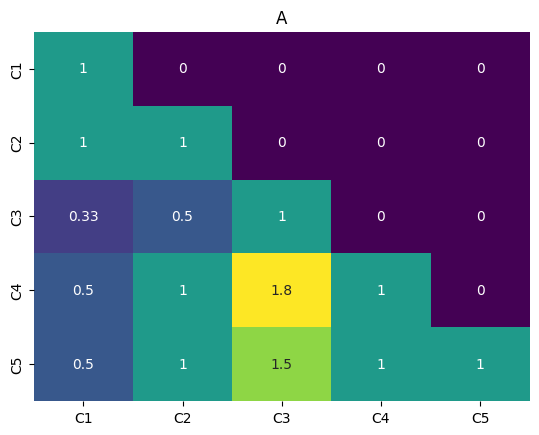

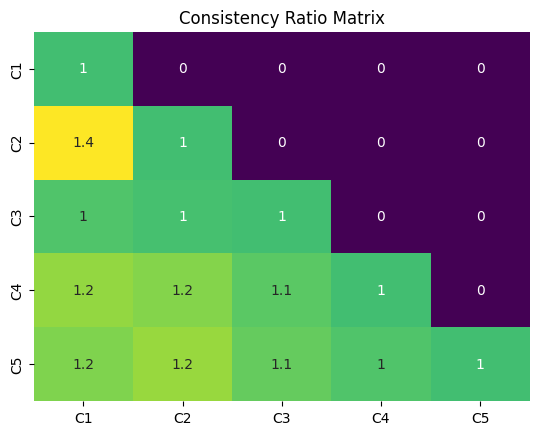

       Weights Weights +/-    RGMM    +/-
Crit-1  31.20%       5.82%  31.29%  6.58%
Crit-2  21.90%       5.36%  21.89%  4.69%
Crit-3  10.60%       0.60%  10.59%  0.60%
Crit-4  18.50%       2.27%  18.45%  2.28%
Crit-5  17.80%       2.43%  17.78%  2.28%
 
Consistency Ratio: 1.36% & Consistency Ratio of Weighted: 1.20%


In [6]:
a_c2_weights = [] # Weight vector for C2
for i in range(len(alternatives)-1):
    for j in range(i+1, len(alternatives)):
        w = alternatives[i]["base_speed"] / alternatives[j]["base_speed"]
        w = round(w) if w > 1 else w # Round off the whole numbers > 1
        a_c2_weights.append(w)

A_C2, weights, cr, rgmm11 = AHP_1_Participant(a_c2_weights)
c2_priority = weights["Weights"].apply(pd.Series).stack().tolist() # Convert weights pandas df vector to normal list
c2_priority = [eval(i.strip('%'))/100 for i in c2_priority] # Convert strings from pandas df vector to list of floats

### C4: Core Count

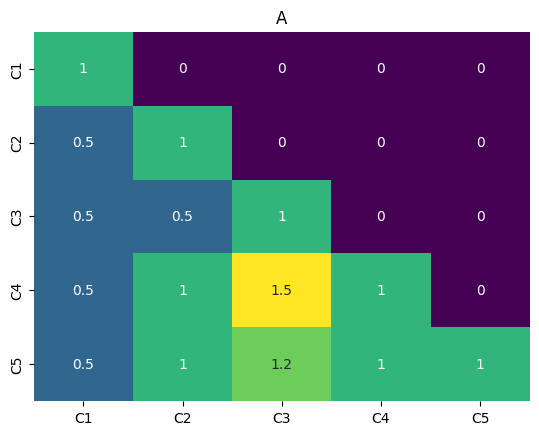

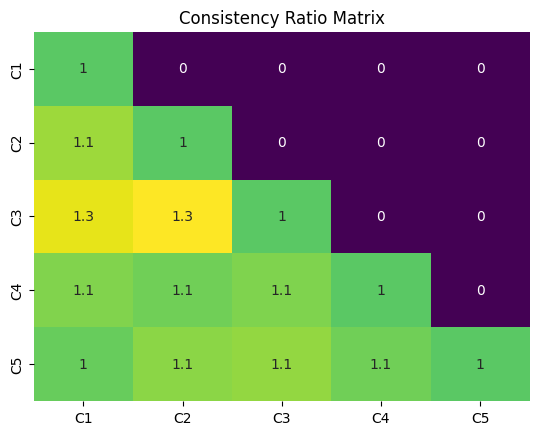

       Weights Weights +/-    RGMM    +/-
Crit-1  33.10%       4.58%  33.12%  5.04%
Crit-2  19.10%       3.77%  19.09%  3.29%
Crit-3  12.90%       2.63%  12.93%  2.67%
Crit-4  17.90%       1.35%  17.86%  1.24%
Crit-5  17.00%       1.40%  17.00%  1.46%
 
Consistency Ratio: 0.95% & Consistency Ratio of Weighted: 1.00%


In [7]:
a_c4_weights = [] # Weight vector for C4
for i in range(len(alternatives)-1):
    for j in range(i+1, len(alternatives)):
        w = alternatives[i]["core_count"] / alternatives[j]["core_count"]
        w = round(w) if w > 1 else w # Round off the whole numbers > 1
        a_c4_weights.append(w)

A_C4, weights, cr, rgmm11 = AHP_1_Participant(a_c4_weights)
c4_priority = weights["Weights"].apply(pd.Series).stack().tolist() # Convert weights pandas df vector to normal list
c4_priority = [eval(i.strip('%'))/100 for i in c4_priority] # Convert strings from pandas df vector to list of floats

### C6: Memory

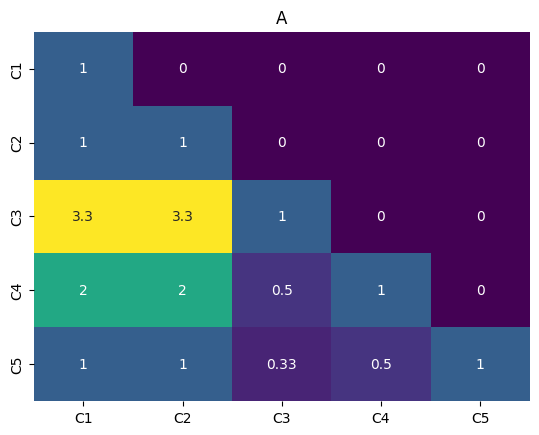

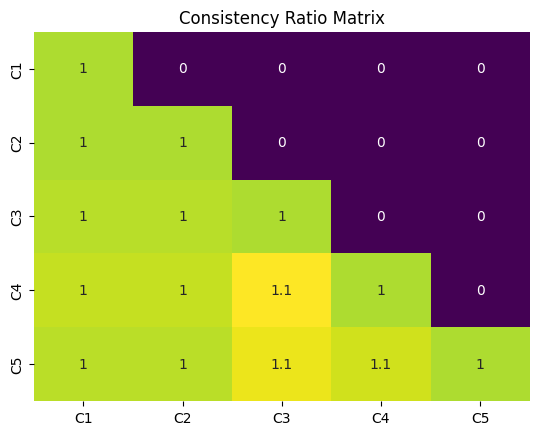

       Weights Weights +/-    RGMM    +/-
Crit-1  12.00%       0.27%  11.97%  0.27%
Crit-2  12.00%       0.27%  11.97%  0.27%
Crit-3  40.70%       3.47%  40.66%  3.36%
Crit-4  23.10%       1.66%  23.15%  1.75%
Crit-5  12.20%       0.76%  12.25%  0.73%
 
Consistency Ratio: 0.21% & Consistency Ratio of Weighted: 0.20%


In [8]:
a_c6_weights = [] # Weight vector for C6
for i in range(len(alternatives)-1):
    for j in range(i+1, len(alternatives)):
        w = alternatives[i]["memory"] / alternatives[j]["memory"]
        w = round(w) if w > 1 else w # Round off the whole numbers > 1
        a_c6_weights.append(w)

A_C6, weights, cr, rgmm11 = AHP_1_Participant(a_c6_weights)
c6_priority = weights["Weights"].apply(pd.Series).stack().tolist() # Convert weights pandas df vector to normal list
c6_priority = [eval(i.strip('%'))/100 for i in c6_priority] # Convert strings from pandas df vector to list of floats

## Calculate Priority Vector for Each Alternative

Now that we have calculated the criteria priority vector and each of the alternative priority vectors with respect to the individual criteria, we can put everything together. By performing a matrix multiplication with all of the alternative priorities WRT each criterion and the criterion priorities, we are left with the decision vector. The largest value in the vector indicates the alternative that is most compatible with the given objective and criteria, relative to the other alternatives.

In [31]:
alt_matrix = np.array((c1_priority, c2_priority, c4_priority, c6_priority))
# print(alt_matrix)
# print(alt_matrix.transpose())
decision_vector = np.matmul(alt_matrix.transpose(), np.array(c_priority))
print(decision_vector)

[[0.39  0.312 0.331 0.12 ]
 [0.18  0.219 0.191 0.12 ]
 [0.097 0.106 0.129 0.407]
 [0.179 0.185 0.179 0.231]
 [0.155 0.178 0.17  0.122]]
[0.237958 0.140192 0.095989 0.134051 0.120979]
